In [1]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
from sklearn.metrics import adjusted_mutual_info_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randrange, choices, random
import math

In [2]:
#load iris data from sklearn

data = load_iris()
np_data_orig = np.array(data["data"])
np_data = np.transpose(np_data_orig)
ground_truth = list(np.array(data["target"]))

In [3]:
#setting the value of K for NMF
num = 3

In [4]:
model = NMF(n_components=num, init="random", solver="cd", verbose=False)

In [5]:
W = model.fit_transform(np_data)
H = model.components_

In [6]:
#determining the predicted label by taking the index of the max value in each column of H
predicted_labels = []
for x in range(H[0].size):
    current_sample = list(H[:,x])
    predicted_labels.append(current_sample.index(max(current_sample)))

In [7]:
#calculated error
adjusted_mutual_info_score(ground_truth,predicted_labels,"arithmetic")

0.5293715628581626

In [8]:
#plot where color is based on ground truth and coordinate is randomly assigned based on predicted label
angle_range = [0]
for i in range(num):
    count = predicted_labels.count(i)
    angle_range.append(int(count / len(predicted_labels) * 360 + angle_range[-1]))

In [9]:
colors = {0:"orange", 1:"green", 2:"blue"}  # colors assigned based on ground truth

In [10]:
def weighted_random():
    rands = range(0, 500)
    weights = range(0, 500)
    
    return choices(rands, weights=weights)[0] / 1000

In [11]:
#assigning point coordinates and color
coords = {}
for i in range(len(predicted_labels)):
    a = randrange(angle_range[predicted_labels[i]],angle_range[predicted_labels[i] + 1]) * math.pi / 180
    r = weighted_random()
    
    coords[r * math.cos(a), r * math.sin(a)] = colors[ground_truth[i]]

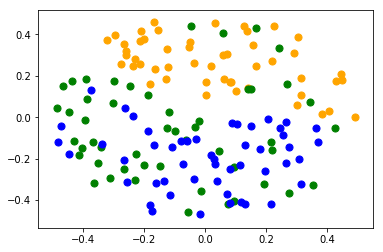

In [12]:
keys = tuple(coords.keys())

for index in range(len(keys)):
    plt.scatter(keys[index][0], keys[index][1], color=coords[keys[index]], s=50)